# U.S. Medical Insurance Costs

An investigation of a medical insurance costs dataset. This is a project through codecademy.

We are working with a file __insurance.csv__ which contains 7 columns:
- Age
- Sex
- bmi
- children
- region
- charges

### Questions
- On average, how much more do smokers pay for insurance than non-smokers?
- On average, how much do charges increase for every additional child?
- On average, which sex pays more - overall and by age group? 
- What is the most influential factor in insurance costs?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance.smoker = insurance.smoker.map(dict(yes = 1, no = 0))

In [4]:
insurance.corr()

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.198341,0.067998,0.787251,1.000000


The strongest correlation is between age and charges, bmi and charges is second.

## Question 1 - On average, how much more do smokers pay for insurance than non-smokers?

In [5]:
## Looks like the regions are evenly distributed
insurance.groupby('region').mean('charges')#.drop(['sex','bmi','smoker','children'],axis = 1)

,age,bmi,children,smoker,charges
region,,,,,
northeast,39.268519,29.173503,1.046296,0.206790,13406.384516
northwest,39.196923,29.199785,1.147692,0.178462,12417.575374
southeast,38.939560,33.355989,1.049451,0.250000,14735.411438
southwest,39.455385,30.596615,1.141538,0.178462,12346.937377


The Southeast region pays roughly 19% more than Southwest

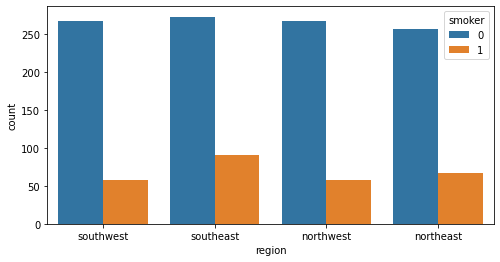

In [6]:
plt.figure(figsize = (8,4))
sns.countplot(data = insurance, x = 'region', hue = 'smoker')
plt.show()

As you can see a majority of the individuals are not smokers

Next let's take a look to see how cost varies between smokers and non-smokers.

In [7]:
def age_range(ages):
    '''Defining a function to establish the age range of customers'''
    age_range = []
    
    for age in ages:
        if age > 59:
            age_range.append('60+')
        elif age > 49:
            age_range.append('50 - 59')
        elif age > 39:
            age_range.append('40 - 49')
        elif age > 29:
            age_range.append('30 - 39')
        elif age > 19:
            age_range.append('20 - 29')
        else:
            age_range.append('18 - 19')
    return age_range

In [8]:
age_ranges = age_range(insurance.age)
insurance['age_range'] = age_ranges

In [9]:
by_cost = pd.crosstab(insurance.smoker, insurance.age_range, values = insurance.charges, aggfunc='mean')

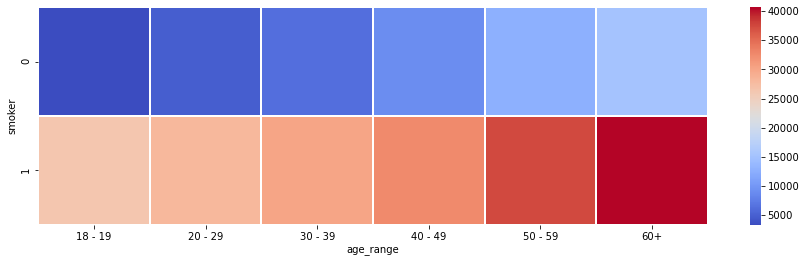

In [10]:
plt.figure(figsize = (15,4))
sns.heatmap(by_cost,cmap = 'coolwarm',linewidth = 1)
plt.show()

## Question 1 - On average, how much more do smokers pay for insurance than non-smokers - overall and by region?
## Answer:
Smokers consistently pay more than non-smokers for insurance. The difference between the two grows as individuals get older

In [11]:
insurance.groupby(['age_range','smoker']).mean(['charges']).drop(['children','bmi','age'],axis = 1).unstack()

charges              
smoker                0             1
age_range                            
18 - 19     3365.419567  26390.231749
20 - 29     4921.634844  28122.215715
30 - 39     6337.362945  30271.246415
40 - 49     9183.342097  32654.718697
50 - 59    12749.344280  37508.752875
60+        15232.709480  40630.695190

## Question 2
On average, how much do charges increase for every additional child?

In [12]:
insurance.groupby(['children','smoker','sex']).mean('charges').drop(['age','bmi'],axis = 1).unstack()

charges              
sex                    female          male
children smoker                            
0        0        7688.318863   7530.806677
         1       30685.059887  31902.398075
1        0        8758.560884   7837.147396
         1       30264.253915  32904.876848
2        0        9921.777645   9020.567024
         1       31663.833195  35297.837461
3        0       10128.716357   9025.530139
         1       30681.604257  33869.169434
4        0       13937.674562  10305.014255
         1                NaN  26532.276933
5        0        8544.113050   7931.658310
         1       19023.260000           NaN

Let's how BMI factors into the equation

In [13]:
def bmi_range(bmi):
    '''Defining a function to establish the age range of customers'''
    bmi_range = []
    
    for b in bmi:
        if b > 44:
            bmi_range.append('45+')
        elif b > 34:
            bmi_range.append('35 - 44')
        elif b > 24:
            bmi_range.append('25 - 34')
        elif b > 14:
            bmi_range.append('15 - 24')
        else:
            bmi_range.append('Under 15')
    return bmi_range

In [14]:
bmi_ranges = bmi_range(insurance.bmi)
insurance['bmi_range'] = bmi_ranges

For the next analysis I'm breaking the dataset apart based on smoker versus non-smoker

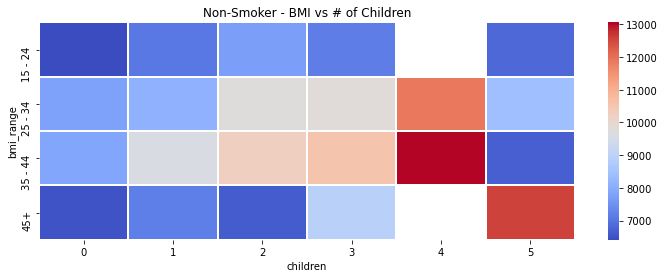

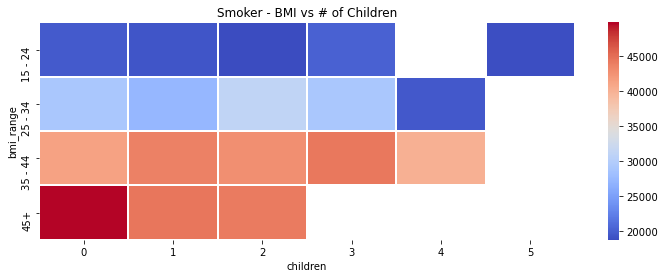

In [15]:
# Non-Smokers
insurance_ns = insurance[insurance.smoker == 0]
by_bmi_ns = pd.crosstab(insurance_ns.bmi_range, insurance_ns.children, values = insurance_ns.charges, aggfunc='mean')

plt.figure(figsize = (12,4))
sns.heatmap(by_bmi_ns,cmap = 'coolwarm',linewidth = 1)
plt.title('Non-Smoker - BMI vs # of Children')
plt.show()

# Smokers
insurance_s = insurance[insurance.smoker == 1]
by_bmi_s = pd.crosstab(insurance_s.bmi_range, insurance_s.children, values = insurance_s.charges, aggfunc='mean')

plt.figure(figsize = (12,4))
sns.heatmap(by_bmi_s,cmap = 'coolwarm',linewidth = 1)
plt.title('Smoker - BMI vs # of Children')
plt.show()

For the next analysis I'm breaking the dataset apart based on male versus female

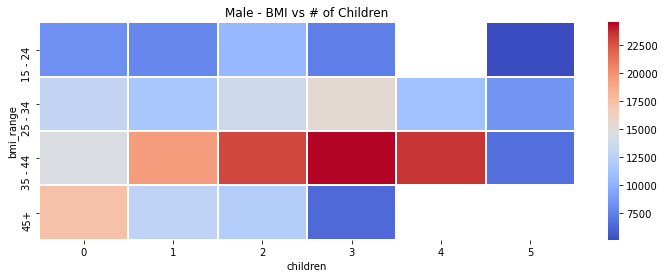

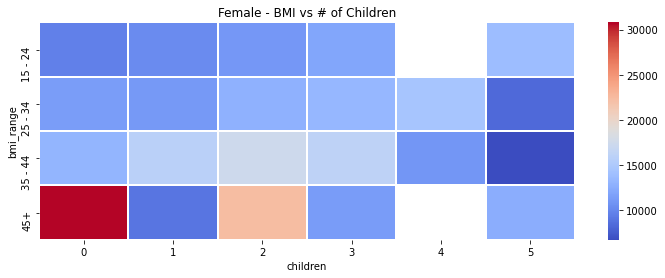

In [16]:
# Males
insurance_m = insurance[insurance.sex == 'male']
by_bmi_m = pd.crosstab(insurance_m.bmi_range, insurance_m.children, values = insurance_m.charges, aggfunc='mean')

plt.figure(figsize = (12,4))
sns.heatmap(by_bmi_m,cmap = 'coolwarm',linewidth = 1)
plt.title('Male - BMI vs # of Children')
plt.show()

# Females
insurance_f = insurance[insurance.sex == 'female']
by_bmi_f = pd.crosstab(insurance_f.bmi_range, insurance_f.children, values = insurance_f.charges, aggfunc='mean')

plt.figure(figsize = (12,4))
sns.heatmap(by_bmi_f,cmap = 'coolwarm',linewidth = 1)
plt.title('Female - BMI vs # of Children')
plt.show()

## Question 2 - On average, how much do charges increase for every additional child?
## Answer
There is not a clear correlation between the number of children and the amount paid for insurance. 

In [17]:
insurance.groupby(['children']).mean('charges').drop(['age','bmi'],axis = 1)

,smoker,charges
children,,
0,0.200348,12365.975602
1,0.188272,12731.171832
2,0.229167,15073.563734
3,0.248408,15355.318367
4,0.120000,13850.656311
5,0.055556,8786.035247


## Question 3 - On average, which sex pays more - overall and by age group? By how much?

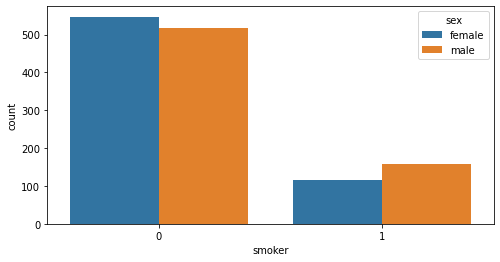

In [18]:
plt.figure(figsize = (8,4))
sns.countplot(data = insurance, x = 'smoker', hue = 'sex')
plt.show()

In [19]:
insurance.groupby(['age_range','smoker','sex']).mean('charges').drop(['children','age','bmi'],axis = 1).unstack()

charges              
sex                     female          male
age_range smoker                            
18 - 19   0        3790.624504   2948.088795
          1       25501.599660  27069.773935
20 - 29   0        5445.993304   4406.557064
          1       24321.008192  30973.121357
30 - 39   0        5927.952412   6794.683222
          1       31892.895933  29280.238376
40 - 49   0        9599.170561   8747.899083
          1       30984.691734  34030.035020
50 - 59   0       13161.141579  12284.165849
          1       37068.955507  37762.482126
60+       0       15421.467984  15030.468225
          1       37508.474454  43529.900160

In [20]:
insurance.groupby(['sex']).mean('charges').drop(['smoker','children','age','bmi'],axis = 1)

,charges
sex,
female,12569.578844
male,13956.751178


## Question 3 - On average, which sex pays more - overall and by age group? 
## Answer

Non-Smoking females pay more than Non-Smoking males. Except from age 30-39.

Smoker males pay more than Smoker females. Except from age 30-39.

Overall males pay more than females, perhaps this is because males are more likely to smoke and we already know smokers pay more than non-smokers

## Question 4 - What is the most influential factor in insurance costs?

In [21]:
insurance_smoker_age = pd.crosstab(insurance.smoker, insurance.age_range, values = insurance.charges, aggfunc='mean')
insurance_smoker_age

age_range,18 - 19,20 - 29,30 - 39,40 - 49,50 - 59,60+
smoker,,,,,,
0,3365.419567,4921.634844,6337.362945,9183.342097,12749.344280,15232.70948
1,26390.231749,28122.215715,30271.246415,32654.718697,37508.752875,40630.69519


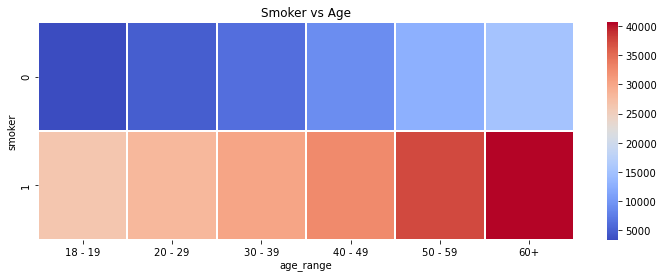

In [22]:
plt.figure(figsize = (12,4))
sns.heatmap(insurance_smoker_age,cmap = 'coolwarm',linewidth = 1)
plt.title('Smoker vs Age')
plt.show()

In [23]:
insurance.corr()

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.198341,0.067998,0.787251,1.000000


## Question 4 - What is the most influential factor in insurance costs?
## Answer

Being a smoker has the strongest correlation with charges.

Age and BMI are also associated with cost but not as strongly as smoking.